In [8]:
import trimesh
import igl
from meshplot import plot
import matplotlib.pyplot as plt
import numpy as np

In [4]:
mesh = trimesh.load_mesh('bunny.mesh')

In [6]:
mesh.vertices.shape

(3485, 3)

In [7]:
points = mesh.vertices

In [9]:
seed_idx = int(np.random.rand() * len(points) * 0.8)
points_removed = points[seed_idx:]
points_selected = points[:seed_idx]

In [10]:
plot(points_removed)

/home/thor/anaconda3/envs/iglenv/lib/python3.6/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float32" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.016860…

In [11]:
plot(points_selected)

/home/thor/anaconda3/envs/iglenv/lib/python3.6/site-packages/traittypes/traittypes.py:101: UserWarning: Given trait value dtype "float32" does not match required type "float64". A coerced copy has been created.
  np.dtype(self.dtype).name))


Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(-0.015585…

In [12]:
## removal w.r.t cutting plane

In [24]:
points = mesh.vertices
points = (points - points.min()) / points.max() - points.min()

In [25]:
plot(points)

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.5105168…

In [52]:
done = False
while not done:
    plane_normal = np.random.randn(3)
    plane_origin = np.random.randn(3)

    pos_points = []

    neg_points = []
    for point in points:
        signed_distance = np.dot(plane_normal, point - plane_origin)
        if signed_distance < 0:
            neg_points.append(point)
        else:
            pos_points.append(point)

    if len(neg_points) <= 0.3 * len(points) and len(neg_points)> 0.2 * len(points):
        done = True
    else:
        done = False
neg_points = np.array(neg_points)
pos_points = np.array(pos_points)

In [47]:
np.array(pos_points).shape, np.array(neg_points).shape

((2755, 3), (730, 3))

In [50]:
import matplotlib.pyplot as plt

In [56]:
!pwd

/home/thor/IIITDPHD/graphics/SummerSchool2021


In [54]:
%matplotlib notebook

<IPython.core.display.Javascript object>


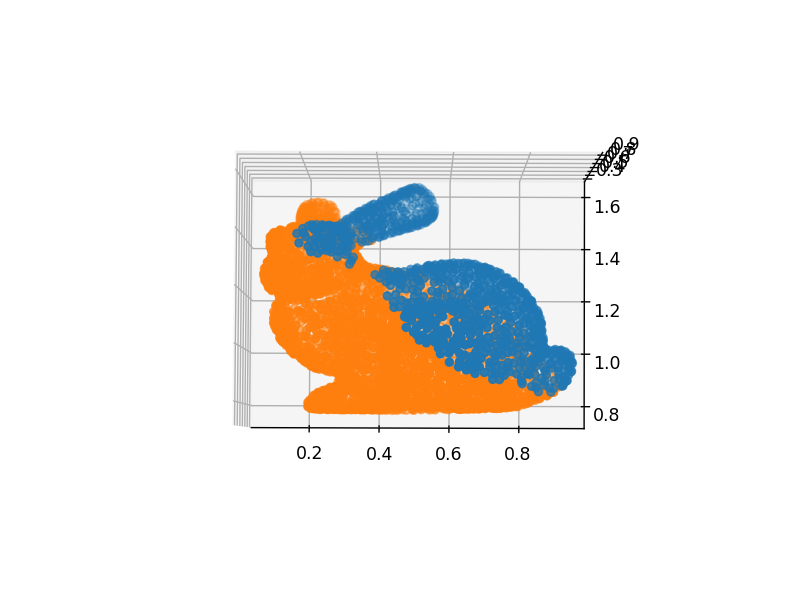

In [55]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter3D(neg_points[:,0], neg_points[:, 1], neg_points[:, 2])
ax.scatter3D(pos_points[:, 0], pos_points[:, 1], pos_points[:, 2])

In [49]:
# m = plot(np.array(neg_points))
# m.add_points(np.array(pos_points))

Renderer(camera=PerspectiveCamera(children=(DirectionalLight(color='white', intensity=0.6, position=(0.5730547…